In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from tensorflow.keras import layers, optimizers
from keras.layers import Dense
from sklearn import svm, datasets

In [ ]:
data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv')
data  

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['month'] = encoder.fit_transform(data['month'])
data['day'] = encoder.fit_transform(data['day'])

In [ ]:
data.month.value_counts()

1     184
11    172
7      54
5      32
3      20
6      17
10     15
0       9
2       9
4       2
8       2
9       1
Name: month, dtype: int64

In [ ]:
data.day.value_counts()

3    95
0    85
2    84
1    74
5    64
4    61
6    54
Name: day, dtype: int64

In [ ]:
data.rain.value_counts()

0.0    509
0.2      2
0.8      2
1.0      1
6.4      1
0.4      1
1.4      1
Name: rain, dtype: int64

In [ ]:
#OHE = pd.get_dummies(data[['day','month','X']], prefix='C')
OHE_day = pd.get_dummies(data.day, prefix='day')
OHE_month = pd.get_dummies(data.month, prefix='month')

In [ ]:
OHE_day

,day_0,day_1,day_2,day_3,day_4,day_5,day_6
0,1,0,0,0,0,0,0
1,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0
4,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...
512,0,0,0,1,0,0,0
513,0,0,0,1,0,0,0
514,0,0,0,1,0,0,0
515,0,0,1,0,0,0,0


In [ ]:
OHE_month

,month_0,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11
0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
512,0,1,0,0,0,0,0,0,0,0,0,0
513,0,1,0,0,0,0,0,0,0,0,0,0
514,0,1,0,0,0,0,0,0,0,0,0,0
515,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
def minmaxscal(s,c,cc):
  x = (cc+'mx')
  sc = MinMaxScaler()
  c[x] = sc.fit_transform(s)
  c.pop(cc)
  return c[x]

In [ ]:
minmaxscal((data[['area']]), data, ('area'))

minmaxscal((data[['X']]), data, ('X'))
minmaxscal((data[['Y']]), data, ('Y'))
minmaxscal((data[['FFMC']]), data, ('FFMC'))
minmaxscal((data[['DMC']]), data, ('DMC'))

minmaxscal((data[['DC']]), data, ('DC'))
minmaxscal((data[['ISI']]), data, ('ISI'))
minmaxscal((data[['temp']]), data, ('temp'))
minmaxscal((data[['RH']]), data, ('RH'))

minmaxscal((data[['wind']]), data, ('wind'))
minmaxscal((data[['rain']]), data, ('rain'))


0      0.00000
1      0.00000
2      0.00000
3      0.03125
4      0.00000
        ...   
512    0.00000
513    0.00000
514    0.00000
515    0.00000
516    0.00000
Name: rainmx, Length: 517, dtype: float64

In [ ]:
data

,month,day,areamx,Xmx,Ymx,FFMCmx,DMCmx,DCmx,ISImx,tempmx,RHmx,windmx,rainmx
0,7,0,0.000000,0.750,0.428571,0.870968,0.086492,0.101325,0.090909,0.192926,0.423529,0.700000,0.00000
1,10,5,0.000000,0.750,0.285714,0.927742,0.118194,0.775419,0.119430,0.508039,0.211765,0.055556,0.00000
2,10,2,0.000000,0.750,0.285714,0.927742,0.146795,0.796294,0.119430,0.398714,0.211765,0.100000,0.00000
3,7,0,0.000000,0.875,0.571429,0.941935,0.110958,0.081623,0.160428,0.196141,0.964706,0.400000,0.03125
4,7,3,0.000000,0.875,0.571429,0.910968,0.172984,0.110590,0.171123,0.295820,0.988235,0.155556,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,1,3,0.005904,0.375,0.142857,0.811613,0.191592,0.771315,0.033868,0.823151,0.200000,0.255556,0.00000
513,1,3,0.049769,0.125,0.285714,0.811613,0.191592,0.771315,0.033868,0.633441,0.658824,0.600000,0.00000
514,1,3,0.010231,0.750,0.285714,0.811613,0.191592,0.771315,0.033868,0.610932,0.647059,0.700000,0.00000
515,1,2,0.000000,0.000,0.285714,0.976774,0.499311,0.711622,0.201426,0.752412,0.317647,0.400000,0.00000


In [ ]:
data = data.drop(['month','day'],axis=1)

In [ ]:
new_data = pd.concat([data, OHE_day, OHE_month], axis=1)

In [ ]:
new_data

,areamx,Xmx,Ymx,FFMCmx,DMCmx,DCmx,ISImx,tempmx,RHmx,windmx,rainmx,day_0,day_1,day_2,day_3,day_4,day_5,day_6,month_0,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11
0,0.000000,0.750,0.428571,0.870968,0.086492,0.101325,0.090909,0.192926,0.423529,0.700000,0.00000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0.000000,0.750,0.285714,0.927742,0.118194,0.775419,0.119430,0.508039,0.211765,0.055556,0.00000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0.000000,0.750,0.285714,0.927742,0.146795,0.796294,0.119430,0.398714,0.211765,0.100000,0.00000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0.000000,0.875,0.571429,0.941935,0.110958,0.081623,0.160428,0.196141,0.964706,0.400000,0.03125,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0.000000,0.875,0.571429,0.910968,0.172984,0.110590,0.171123,0.295820,0.988235,0.155556,0.00000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,0.005904,0.375,0.142857,0.811613,0.191592,0.771315,0.033868,0.823151,0.200000,0.255556,0.00000,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
513,0.049769,0.125,0.285714,0.811613,0.191592,0.771315,0.033868,0.633441,0.658824,0.600000,0.00000,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
514,0.010231,0.750,0.285714,0.811613,0.191592,0.771315,0.033868,0.610932,0.647059,0.700000,0.00000,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
515,0.000000,0.000,0.285714,0.976774,0.499311,0.711622,0.201426,0.752412,0.317647,0.400000,0.00000,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
new_data.isnull().any()

areamx      False
Xmx         False
Ymx         False
FFMCmx      False
DMCmx       False
DCmx        False
ISImx       False
tempmx      False
RHmx        False
windmx      False
rainmx      False
day_0       False
day_1       False
day_2       False
day_3       False
day_4       False
day_5       False
day_6       False
month_0     False
month_1     False
month_2     False
month_3     False
month_4     False
month_5     False
month_6     False
month_7     False
month_8     False
month_9     False
month_10    False
month_11    False
dtype: bool

In [ ]:
new_data = new_data.dropna()

In [ ]:
new_data.corr()

,areamx,Xmx,Ymx,FFMCmx,DMCmx,DCmx,ISImx,tempmx,RHmx,windmx,rainmx,day_0,day_1,day_2,day_3,day_4,day_5,day_6,month_0,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11
areamx,1.000000,0.063385,0.044873,0.040122,0.072994,0.049383,0.008258,0.097844,-0.075519,0.012317,-0.007366,-0.052911,-0.021206,0.087868,-0.020463,0.020121,-0.001333,-0.011452,-0.008280,-0.004187,0.001010,-0.020732,-0.012589,0.006149,-0.020314,-0.045596,0.006264,-0.008893,-0.016878,0.056573
Xmx,0.063385,1.000000,0.539548,-0.021039,-0.048384,-0.085916,0.006210,-0.051258,0.085223,0.018798,0.065387,-0.020061,0.039367,0.024461,-0.029338,0.000457,-0.027521,0.016035,0.063832,-0.059669,-0.006547,0.041721,-0.045002,0.061062,0.129616,0.007827,0.008917,0.025344,0.089545,-0.087216
Ymx,0.044873,0.539548,1.000000,-0.046308,0.007782,-0.101178,-0.024488,-0.024103,0.062221,-0.020341,0.033234,-0.048773,0.021640,0.003483,0.006172,0.027873,-0.053475,0.050495,-0.008405,-0.010404,0.075850,0.016358,0.010153,0.061449,0.078594,0.050495,-0.015206,-0.046570,0.004717,-0.105465
FFMCmx,0.040122,-0.021039,-0.046308,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.019306,-0.059396,-0.019637,-0.089517,0.071730,0.011225,0.093908,-0.117199,0.228103,-0.137044,-0.281535,-0.454771,0.031833,-0.040634,-0.074327,-0.037230,-0.088964,-0.005998,0.076609
DMCmx,0.072994,-0.048384,0.007782,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,-0.012010,-0.107921,-0.003653,0.025355,0.087672,0.000016,0.017939,-0.197543,0.497928,-0.176301,-0.317899,-0.105647,-0.001946,-0.050403,-0.407404,-0.081980,-0.074218,-0.187632,0.110907
DCmx,0.049383,-0.085916,-0.101178,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,-0.004220,-0.052993,-0.035189,-0.001431,0.051859,0.028368,0.024803,-0.268211,0.279361,-0.105642,-0.399277,-0.115064,-0.100887,-0.186183,-0.650427,-0.114209,-0.078380,0.093279,0.531857
ISImx,0.008258,0.006210,-0.024488,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.046695,-0.158601,-0.038585,-0.003243,-0.022406,0.068610,0.125415,-0.106478,0.334639,-0.162322,-0.249777,-0.103588,0.020982,0.111516,-0.143520,-0.060493,-0.076559,-0.071154,-0.068877
tempmx,0.097844,-0.051258,-0.024103,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,-0.071949,-0.136529,0.034899,0.014403,0.051432,0.035630,0.090580,-0.157051,0.351404,-0.329648,-0.320015,-0.146520,0.142588,0.051015,-0.341797,-0.045540,-0.053798,-0.053513,0.088006
RHmx,-0.075519,0.085223,0.062221,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,0.064506,0.009376,-0.023869,0.136220,-0.123061,-0.014211,-0.087508,0.021235,0.054761,-0.047714,0.140430,0.170923,0.013185,0.009382,-0.089836,0.086822,-0.035885,-0.072334,-0.062596
windmx,0.012317,0.018798,-0.020341,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.118090,-0.063881,-0.063799,0.027981,-0.062553,0.053396,-0.019965,0.048266,0.028577,0.269702,-0.029431,-0.070245,-0.040645,0.012124,0.181433,0.015054,0.011864,-0.053850,-0.181476


In [ ]:
#new_data.month_jan.value_counts()

In [ ]:
new_data.shape

(517, 30)

In [ ]:
fitur = new_data.drop(columns='areamx').values
label = new_data['areamx']

X_train, X_test, y_train, y_test = train_test_split(fitur, label, test_size=0.3, random_state=20)

# model 1

In [ ]:
model = Sequential()
model.add(Dense(15, input_dim=29)) 
model.add(Dense(10)) 
model.add(Dense(1, activation = 'linear'))

model.compile(loss="mean_absolute_error", optimizer=optimizers.SGD(learning_rate=0.001), metrics=['accuracy','mae', 'mse'])

model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 15)                450       
                                                                 
 dense_51 (Dense)            (None, 10)                160       
                                                                 
 dense_52 (Dense)            (None, 1)                 11        
                                                                 
Total params: 621
Trainable params: 621
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=32, verbose=1)

Epoch 1/200
12/12 [==============================] - 1s 18ms/step - loss: 0.5420 - accuracy: 0.4183 - mae: 0.5420 - mse: 0.4292 - val_loss: 0.5200 - val_accuracy: 0.4295 - val_mae: 0.5200 - val_mse: 0.4040
Epoch 2/200
12/12 [==============================] - 0s 6ms/step - loss: 0.5129 - accuracy: 0.4017 - mae: 0.5129 - mse: 0.3873 - val_loss: 0.4928 - val_accuracy: 0.4295 - val_mae: 0.4928 - val_mse: 0.3683
Epoch 3/200
12/12 [==============================] - 0s 5ms/step - loss: 0.4928 - accuracy: 0.3961 - mae: 0.4928 - mse: 0.3592 - val_loss: 0.4709 - val_accuracy: 0.4167 - val_mae: 0.4709 - val_mse: 0.3413
Epoch 4/200
12/12 [==============================] - 0s 5ms/step - loss: 0.4752 - accuracy: 0.3961 - mae: 0.4752 - mse: 0.3375 - val_loss: 0.4521 - val_accuracy: 0.4167 - val_mae: 0.4521 - val_mse: 0.3181
Epoch 5/200
12/12 [==============================] - 0s 5ms/step - loss: 0.4612 - accuracy: 0.3906 - mae: 0.4612 - mse: 0.3200 - val_loss: 0.4411 - val_accuracy: 0.4167 - val_mae:

## hasil nya

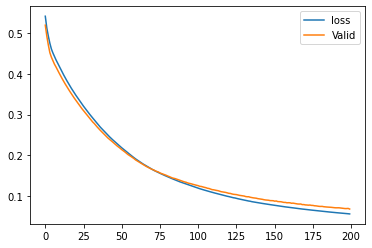

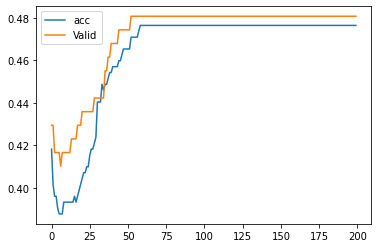

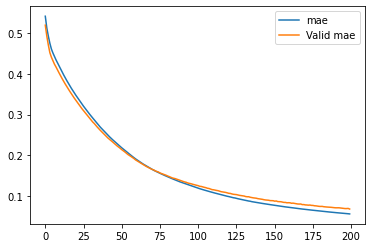

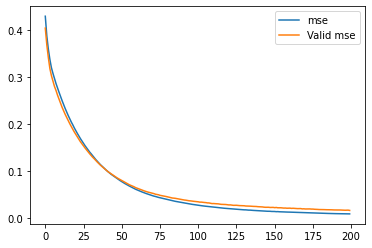

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='Valid')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='Valid')
plt.legend()
plt.show()

plt.plot(history.history['mae'], label='mae')
plt.plot(history.history['val_mae'], label='Valid mae')
plt.legend()
plt.show()

plt.plot(history.history['mse'], label='mse')
plt.plot(history.history['val_mse'], label='Valid mse')
plt.legend()
plt.show()

# model 2

In [ ]:
model = Sequential()
model.add(Dense(29, input_dim=29)) 
model.add(Dense(1, activation = 'linear'))

model.compile(loss="mean_absolute_error", optimizer=optimizers.SGD(learning_rate=0.001), metrics=['accuracy','mae', 'mse'])

model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_76 (Dense)            (None, 29)                870       
                                                                 
 dense_77 (Dense)            (None, 1)                 30        
                                                                 
Total params: 900
Trainable params: 900
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=32, verbose=1)

Epoch 1/200
12/12 [==============================] - 1s 18ms/step - loss: 0.3682 - accuracy: 0.3380 - mae: 0.3682 - mse: 0.1945 - val_loss: 0.3497 - val_accuracy: 0.3590 - val_mae: 0.3497 - val_mse: 0.1697
Epoch 2/200
12/12 [==============================] - 0s 5ms/step - loss: 0.3201 - accuracy: 0.4017 - mae: 0.3201 - mse: 0.1493 - val_loss: 0.3116 - val_accuracy: 0.3718 - val_mae: 0.3116 - val_mse: 0.1350
Epoch 3/200
12/12 [==============================] - 0s 5ms/step - loss: 0.2886 - accuracy: 0.4377 - mae: 0.2886 - mse: 0.1209 - val_loss: 0.2853 - val_accuracy: 0.4167 - val_mae: 0.2853 - val_mse: 0.1153
Epoch 4/200
12/12 [==============================] - 0s 4ms/step - loss: 0.2667 - accuracy: 0.4460 - mae: 0.2667 - mse: 0.1033 - val_loss: 0.2641 - val_accuracy: 0.4423 - val_mae: 0.2641 - val_mse: 0.1021
Epoch 5/200
12/12 [==============================] - 0s 4ms/step - loss: 0.2490 - accuracy: 0.4543 - mae: 0.2490 - mse: 0.0921 - val_loss: 0.2488 - val_accuracy: 0.4551 - val_mae:

## hasil nya

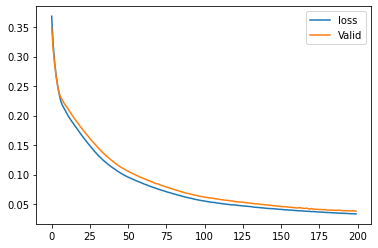

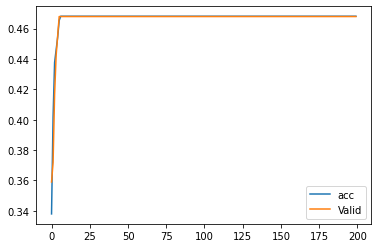

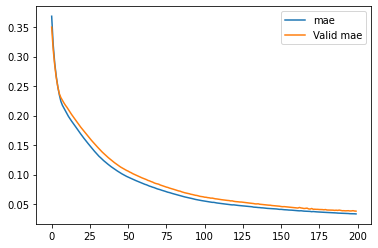

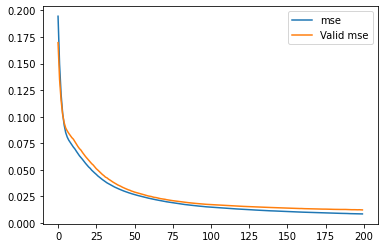

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='Valid')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='Valid')
plt.legend()
plt.show()

plt.plot(history.history['mae'], label='mae')
plt.plot(history.history['val_mae'], label='Valid mae')
plt.legend()
plt.show()

plt.plot(history.history['mse'], label='mse')
plt.plot(history.history['val_mse'], label='Valid mse')
plt.legend()
plt.show()

# model 3

In [ ]:
model = Sequential()
model.add(Dense(29, input_dim=29)) 
model.add(Dense(29, input_dim=29)) 
model.add(Dense(1, activation = 'linear'))

model.compile(loss="mean_absolute_error", optimizer=optimizers.SGD(learning_rate=0.001), metrics=['accuracy','mae', 'mse'])

model.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_78 (Dense)            (None, 29)                870       
                                                                 
 dense_79 (Dense)            (None, 29)                870       
                                                                 
 dense_80 (Dense)            (None, 1)                 30        
                                                                 
Total params: 1,770
Trainable params: 1,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=32, verbose=1)

Epoch 1/200
12/12 [==============================] - 1s 19ms/step - loss: 0.4209 - accuracy: 0.4432 - mae: 0.4209 - mse: 0.2544 - val_loss: 0.3605 - val_accuracy: 0.4423 - val_mae: 0.3605 - val_mse: 0.1975
Epoch 2/200
12/12 [==============================] - 0s 5ms/step - loss: 0.3488 - accuracy: 0.4349 - mae: 0.3488 - mse: 0.1811 - val_loss: 0.3213 - val_accuracy: 0.4167 - val_mae: 0.3213 - val_mse: 0.1567
Epoch 3/200
12/12 [==============================] - 0s 4ms/step - loss: 0.3120 - accuracy: 0.4238 - mae: 0.3120 - mse: 0.1528 - val_loss: 0.3047 - val_accuracy: 0.4167 - val_mae: 0.3047 - val_mse: 0.1417
Epoch 4/200
12/12 [==============================] - 0s 5ms/step - loss: 0.2958 - accuracy: 0.4238 - mae: 0.2958 - mse: 0.1386 - val_loss: 0.2916 - val_accuracy: 0.4167 - val_mae: 0.2916 - val_mse: 0.1318
Epoch 5/200
12/12 [==============================] - 0s 4ms/step - loss: 0.2829 - accuracy: 0.4183 - mae: 0.2829 - mse: 0.1295 - val_loss: 0.2806 - val_accuracy: 0.4167 - val_mae:

## hasil nya

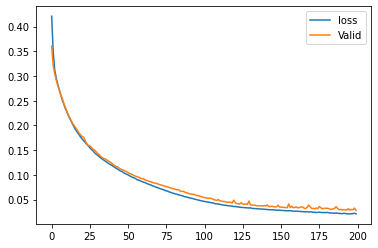

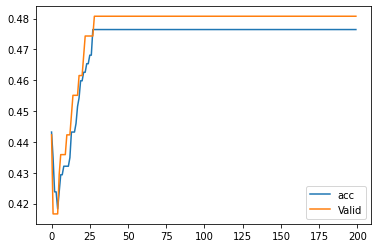

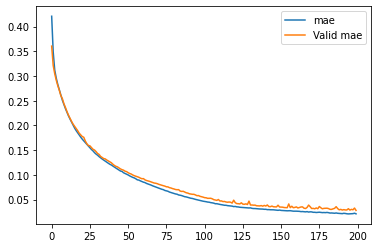

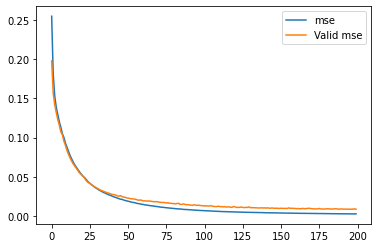

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='Valid')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='Valid')
plt.legend()
plt.show()

plt.plot(history.history['mae'], label='mae')
plt.plot(history.history['val_mae'], label='Valid mae')
plt.legend()
plt.show()

plt.plot(history.history['mse'], label='mse')
plt.plot(history.history['val_mse'], label='Valid mse')
plt.legend()
plt.show()

# model 4

In [ ]:
model = Sequential()

model.add(Dense(29, input_dim=29, activation = 'relu')) 
model.add(Dense(1, activation = 'relu'))

model.compile(loss="mean_absolute_error", optimizer=optimizers.SGD(learning_rate=0.001), metrics=['accuracy','mae', 'mse'])

model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_83 (Dense)            (None, 29)                870       
                                                                 
 dense_84 (Dense)            (None, 1)                 30        
                                                                 
Total params: 900
Trainable params: 900
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=32, verbose=1)

Epoch 1/200
12/12 [==============================] - 1s 34ms/step - loss: 0.3718 - accuracy: 0.3269 - mae: 0.3718 - mse: 0.1872 - val_loss: 0.3392 - val_accuracy: 0.4167 - val_mae: 0.3392 - val_mse: 0.1523
Epoch 2/200
12/12 [==============================] - 0s 11ms/step - loss: 0.3261 - accuracy: 0.3546 - mae: 0.3261 - mse: 0.1513 - val_loss: 0.2940 - val_accuracy: 0.4295 - val_mae: 0.2940 - val_mse: 0.1205
Epoch 3/200
12/12 [==============================] - 0s 18ms/step - loss: 0.2827 - accuracy: 0.3684 - mae: 0.2827 - mse: 0.1208 - val_loss: 0.2519 - val_accuracy: 0.4423 - val_mae: 0.2519 - val_mse: 0.0945
Epoch 4/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2422 - accuracy: 0.4072 - mae: 0.2422 - mse: 0.0959 - val_loss: 0.2141 - val_accuracy: 0.4551 - val_mae: 0.2141 - val_mse: 0.0737
Epoch 5/200
12/12 [==============================] - 0s 16ms/step - loss: 0.2068 - accuracy: 0.4294 - mae: 0.2068 - mse: 0.0760 - val_loss: 0.1816 - val_accuracy: 0.4615 - val_

## hasil nya

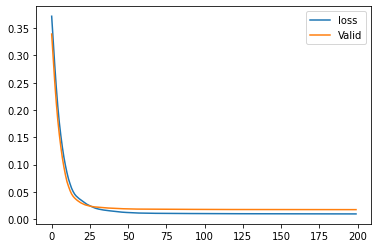

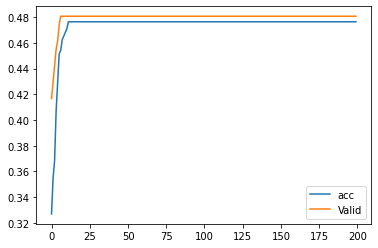

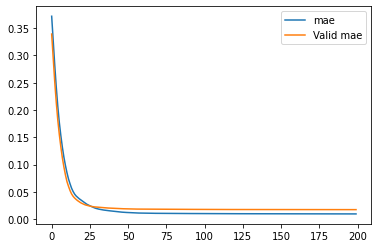

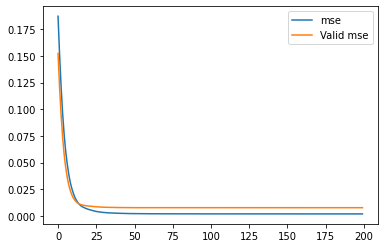

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='Valid')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='Valid')
plt.legend()
plt.show()

plt.plot(history.history['mae'], label='mae')
plt.plot(history.history['val_mae'], label='Valid mae')
plt.legend()
plt.show()

plt.plot(history.history['mse'], label='mse')
plt.plot(history.history['val_mse'], label='Valid mse')
plt.legend()
plt.show()

# model 5

In [ ]:
model = Sequential()

model.add(Dense(29, input_dim=29, activation = 'linear')) 
model.add(Dense(1, activation = 'linear'))

model.compile(loss="mean_absolute_error", optimizer=optimizers.SGD(learning_rate=0.001), metrics=['accuracy','mae', 'mse'])

model.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_87 (Dense)            (None, 29)                870       
                                                                 
 dense_88 (Dense)            (None, 1)                 30        
                                                                 
Total params: 900
Trainable params: 900
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=32, verbose=1)

Epoch 1/200
12/12 [==============================] - 1s 34ms/step - loss: 0.3718 - accuracy: 0.3269 - mae: 0.3718 - mse: 0.1872 - val_loss: 0.3392 - val_accuracy: 0.4167 - val_mae: 0.3392 - val_mse: 0.1523
Epoch 2/200
12/12 [==============================] - 0s 11ms/step - loss: 0.3261 - accuracy: 0.3546 - mae: 0.3261 - mse: 0.1513 - val_loss: 0.2940 - val_accuracy: 0.4295 - val_mae: 0.2940 - val_mse: 0.1205
Epoch 3/200
12/12 [==============================] - 0s 18ms/step - loss: 0.2827 - accuracy: 0.3684 - mae: 0.2827 - mse: 0.1208 - val_loss: 0.2519 - val_accuracy: 0.4423 - val_mae: 0.2519 - val_mse: 0.0945
Epoch 4/200
12/12 [==============================] - 0s 15ms/step - loss: 0.2422 - accuracy: 0.4072 - mae: 0.2422 - mse: 0.0959 - val_loss: 0.2141 - val_accuracy: 0.4551 - val_mae: 0.2141 - val_mse: 0.0737
Epoch 5/200
12/12 [==============================] - 0s 16ms/step - loss: 0.2068 - accuracy: 0.4294 - mae: 0.2068 - mse: 0.0760 - val_loss: 0.1816 - val_accuracy: 0.4615 - val_

## hasil nya

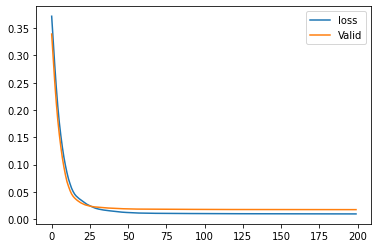

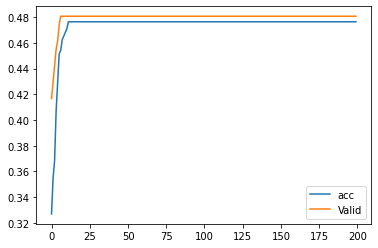

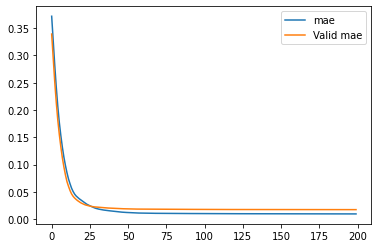

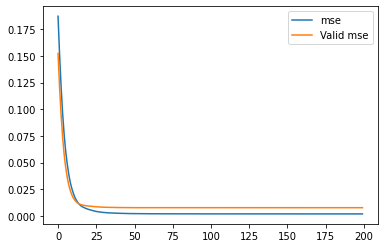

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='Valid')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='Valid')
plt.legend()
plt.show()

plt.plot(history.history['mae'], label='mae')
plt.plot(history.history['val_mae'], label='Valid mae')
plt.legend()
plt.show()

plt.plot(history.history['mse'], label='mse')
plt.plot(history.history['val_mse'], label='Valid mse')
plt.legend()
plt.show()

# callback

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
es = EarlyStopping(monitor=('mae'),mode='min', verbose=1, patience=40)
mc = ModelCheckpoint('best.h5', monitor='mae', mode='min', verbose=1, save_best_only=True)

In [ ]:
history3 = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, batch_size=32, verbose=1, callbacks=[es, mc])


Epoch 1/1000
 1/12 [=>............................] - ETA: 4s - loss: 0.5118 - accuracy: 0.1875 - mae: 0.5118 - mse: 0.3458
Epoch 00001: mae did not improve from 0.00937
12/12 [==============================] - 1s 19ms/step - loss: 0.5976 - accuracy: 0.2271 - mae: 0.5976 - mse: 0.4510 - val_loss: 0.5130 - val_accuracy: 0.2436 - val_mae: 0.5130 - val_mse: 0.3571
Epoch 2/1000
 1/12 [=>............................] - ETA: 0s - loss: 0.5931 - accuracy: 0.1562 - mae: 0.5931 - mse: 0.4298
Epoch 00002: mae did not improve from 0.00937
12/12 [==============================] - 0s 4ms/step - loss: 0.4897 - accuracy: 0.2742 - mae: 0.4897 - mse: 0.3249 - val_loss: 0.4160 - val_accuracy: 0.3077 - val_mae: 0.4160 - val_mse: 0.2520
Epoch 3/1000
 1/12 [=>............................] - ETA: 0s - loss: 0.3990 - accuracy: 0.3125 - mae: 0.3990 - mse: 0.2281
Epoch 00003: mae did not improve from 0.00937
12/12 [==============================] - 0s 6ms/step - loss: 0.3940 - accuracy: 0.3047 - mae: 0.3940 - 

## hasil callback


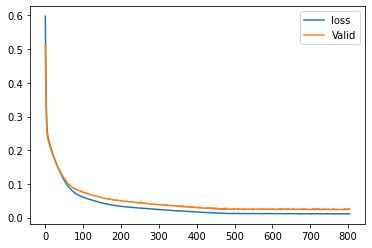

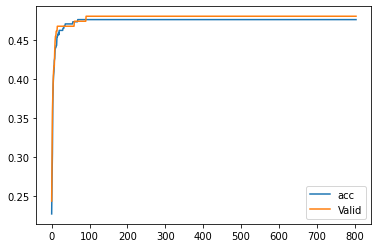

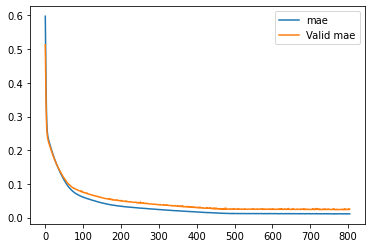

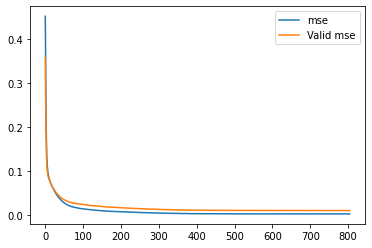

In [ ]:
plt.plot(history3.history['loss'], label='loss')
plt.plot(history3.history['val_loss'], label='Valid')
plt.legend()
plt.show()

plt.plot(history3.history['accuracy'], label='acc')
plt.plot(history3.history['val_accuracy'], label='Valid')
plt.legend()
plt.show()

plt.plot(history3.history['mae'], label='mae')
plt.plot(history3.history['val_mae'], label='Valid mae')
plt.legend()
plt.show()

plt.plot(history3.history['mse'], label='mse')
plt.plot(history3.history['val_mse'], label='Valid mse')
plt.legend()
plt.show()